# MLP Using Mnist Dataset

## Imports and stuff

In [24]:
cd ../../

/home/vpoglioni/Documentos/Repos/neural-networks


In [121]:
from utils.data_manipulation import Data
from utils.data_visualization import DataViz
from utils.model import ModelUtils

In [146]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

## Dataset Visualization

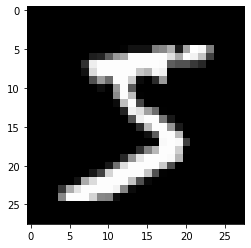

In [123]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap="gray")
plt.show()

## Data Manipulation
Normalize and flatten the arrays

In [124]:
def flatten_all(input_data):
    new_data = []
    for data in input_data:
        new_data.append(data.flatten())
    return np.array(new_data)

x_train = flatten_all(Data.normalize_data(x_train, 255))
# y_train = flatten_all(Data.normalize_data(y_train, 255))
x_test = flatten_all(Data.normalize_data(x_test, 255))
# y_test = flatten_all(Data.normalize_data(y_test, 255))

input_shape = x_train[0].shape[0]

## Models

Fixed 20 epochs to test all models

In [135]:
def create_model(input_shape, optimizer, hidden_dim, activation, num_classes):
    input_img = Input(shape=(input_shape,))
    hidden = Dense(hidden_dim, activation=activation)(input_img)
    output = Dense(num_classes, activation='softmax')(hidden)

    mlp = Model(input_img, output)

    mlp.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return mlp

epochs = 20
classes = 10

### Model 1
Features:
- SGD optimizer
- 1 hidden layer of shape 64
- Learning rate = 0.01
- Batch size = 20
- Relu on hidden and softmax on output

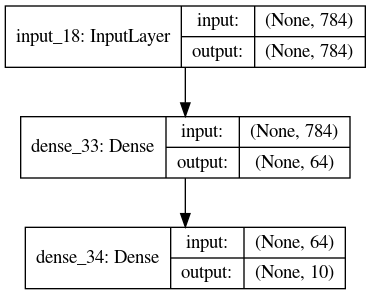

In [147]:
from keras.utils.vis_utils import plot_model
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01
    ),
    64, 
    "relu", 
    classes)
plot_model(mlp, show_shapes=True, show_layer_names=True)

In [148]:
mlp_train = mlp.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=20,
    shuffle=True,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.5421 - acc: 0.8569 - val_loss: 0.3175 - val_acc: 0.9103
Epoch 2/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2993 - acc: 0.9153 - val_loss: 0.2578 - val_acc: 0.9287
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2551 - acc: 0.9285 - val_loss: 0.2325 - val_acc: 0.9339
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2272 - acc: 0.9355 - val_loss: 0.2107 - val_acc: 0.9395
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2064 - acc: 0.9420 - val_loss: 0.1939 - val_acc: 0.9450
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1894 - acc: 0.9465 - val_loss: 0.1807 - val_acc: 0.9494
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1753 - acc: 0.9505 - val_loss: 0.1687 - val_acc

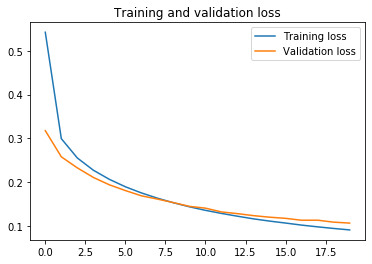

In [149]:
DataViz.plot_loss(
    mlp_train.history['loss'],
    mlp_train.history['val_loss'],
    range(epochs)
)

### Model 2
Increased batch size from model 2
Features:
- SGD optimizer
- 1 hidden layer of shape 64
- Learning rate = 0.01
- Batch size = 50
- Relu on hidden and softmax on output

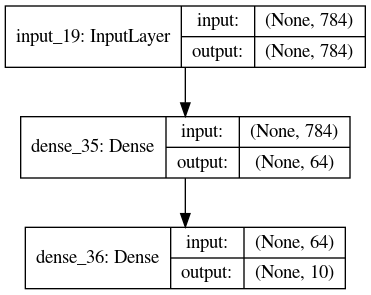

In [150]:
from keras.utils.vis_utils import plot_model
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01
    ),
    64, 
    "relu", 
    classes)
plot_model(mlp, show_shapes=True, show_layer_names=True)

In [151]:
mlp_train = mlp.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=50,
    shuffle=True,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.7981 - acc: 0.8012 - val_loss: 0.4245 - val_acc: 0.8904
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.3919 - acc: 0.8933 - val_loss: 0.3369 - val_acc: 0.9067
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.3333 - acc: 0.9068 - val_loss: 0.3005 - val_acc: 0.9160
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.3029 - acc: 0.9146 - val_loss: 0.2777 - val_acc: 0.9216
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2815 - acc: 0.9200 - val_loss: 0.2628 - val_acc: 0.9251
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2647 - acc: 0.9247 - val_loss: 0.2475 - val_acc: 0.9302
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.2505 - acc: 0.9284 - val_loss: 0.2374 - val_acc

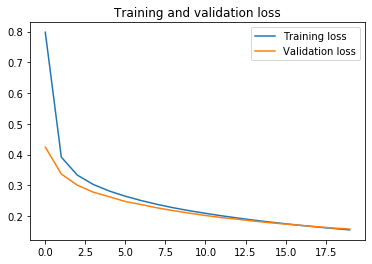

In [152]:
DataViz.plot_loss(
    mlp_train.history['loss'],
    mlp_train.history['val_loss'],
    range(epochs)
)

### Model 3
Bigger learning rate from model 2
Features:
- SGD optimizer
- 1 hidden layer of shape 64
- Learning rate = 0.1
- Batch size = 50
- Relu on hidden and softmax on output

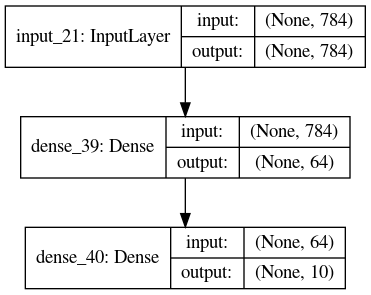

In [156]:
from keras.utils.vis_utils import plot_model
mlp = create_model(
    input_shape,
    SGD(
        lr=0.1
    ),
    64, 
    "relu", 
    classes)
plot_model(mlp, show_shapes=True, show_layer_names=True)

In [157]:
mlp_train = mlp.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=20,
    shuffle=True,
    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2705 - acc: 0.9207 - val_loss: 0.1505 - val_acc: 0.9537
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1316 - acc: 0.9616 - val_loss: 0.1189 - val_acc: 0.9626
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0982 - acc: 0.9702 - val_loss: 0.0945 - val_acc: 0.9713
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0788 - acc: 0.9764 - val_loss: 0.0896 - val_acc: 0.9731
Epoch 5/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0667 - acc: 0.9795 - val_loss: 0.0871 - val_acc: 0.9749
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0567 - acc: 0.9822 - val_loss: 0.0926 - val_acc: 0.9726
Epoch 7/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0492 - acc: 0.9849 - val_loss: 0.0812 - val_acc

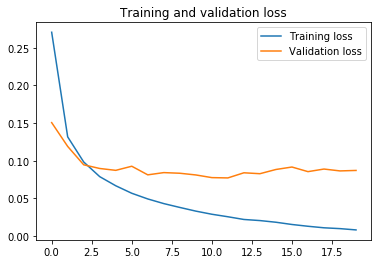

In [158]:
DataViz.plot_loss(
    mlp_train.history['loss'],
    mlp_train.history['val_loss'],
    range(epochs)
)